(4000, 4)


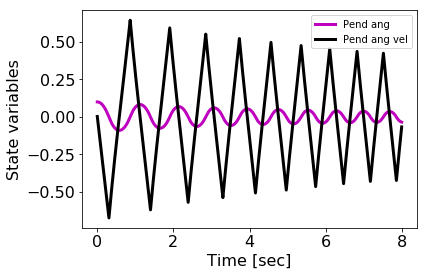

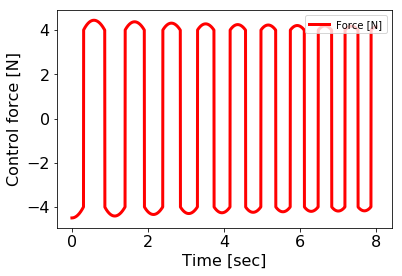

In [176]:
import numpy as np
import matplotlib.pyplot as plt

def pendMat():
    m = 0.1 #Mass of the pendulum
    M = 1 #Mass of the cart
    l = 1 #Length of the pendulum
    I = 0.5*m*l**2 #Moment of inertia of the pendulum
    beta = 0.3 #Friction of the cart
    g = 9.81 #Acceleration of gravity
    
    den = I*(M+m) + M*m*l**2;
    
    A = np.array([[0, 1, 0, 0],[0, -(I + m*l**2)*beta/den, ((m*l)**2)*g/den, 0],[0,0,0,1],[0,-m*l*beta/den,(M+m)*m*g*l/den,0]]);
    B = np.array([0,(I+m*l**2)/den,0,m*l/den]);
    return A,B

def pendDyna(state,A,B,force):
    #I = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    I = np.eye(4);
    T = 0.002; #Sampling step

    Ab = np.array(I+T*A);
    state = np.dot(Ab,state) + T*np.dot(B,force);
    state = np.array(state);
    return state

def controller(K,state):
    force = -np.dot(K,np.transpose(state));
    return force

def angPL(ang):
    mu = 0;
    if (ang >= 0) & (ang <= 0.4):
        mu = (1/0.4)*ang;
    elif ang > 0.4:
        mu = 1;
    return mu

def angNL(ang):
    mu = 0;
    if (ang <= 0) & (ang >= -0.4):
        mu = -(1/0.4)*ang;
    elif ang < -0.4:
        mu = 1;
    return mu

def angPS(ang):
    mu = 0;
    if (ang >= 0) & (ang <= 0.4):
        mu = -(1/0.4)*ang + 1;
    elif ang > 0.4:
        mu = 0;
    return mu

def angNS(ang):
    mu = 0;
    if (ang <= 0) & (ang >= -0.4):
        mu = (1/0.4)*ang + 1;
    elif ang < -0.4:
        mu = 0;
    return mu


def fuzzyCont(state):
    ang = state[2];
    muPL = angPL(ang);
    muNL = angNL(ang);
    muPS = angPS(ang);
    muNS = angNS(ang);
    
    force = (-6*muPL + 6*muNL - 4*muPS + 4*muNS)/(muPL+muNL+muPS+muNS);
    return force
    
state = np.array([0,0,0.1,0]);#Initial states - cart position, cart velocity, pendulum angle, pendulum angular velocity
K = np.array([-0.4472,-1.7709,31.3293,12.0004]);

A,B = pendMat();#Call the function to obtain A and B matrices

force = 1;
d = []
s = []
T = 0.002
N = 4000
for i in range(N): #Loop for N*T seconds
    
    state = pendDyna(state,A,B,force); #Obtain the next value of the state vector
    #force = controller(K,state) #Call the controller function to obtain the force to push/pull the cart
    force = fuzzyCont(state);
    
    s.append(state)
    d.append([i*T,force]);
    
d = np.array(d)
s = np.array(s)
print(s.shape)

#Figure 1
#plt.plot(d[:,0],s[:,0],'b-',label = 'Cart pos',linewidth = 3);
#plt.plot(d[:,0],s[:,1],'r-',label = 'Cart vel',linewidth = 3);
plt.plot(d[:,0],s[:,2],'m-',label = 'Pend ang',linewidth = 3);
plt.plot(d[:,0],s[:,3],'k-',label = 'Pend ang vel',linewidth = 3)

plt.legend(loc = 'upper right');
plt.xlabel('Time [sec]',fontsize = 16);
plt.ylabel('State variables',fontsize = 16);
plt.tick_params(labelsize=16)
plt.show();
# Figure 2
plt.plot(d[:,0],d[:,1],'r-',linewidth = 3,label='Force [N]');
plt.xlabel('Time [sec]',fontsize = 16);
plt.ylabel('Control force [N]',fontsize = 16);
plt.tick_params(labelsize=16)
plt.legend(loc = 'upper right')
plt.show();


In [63]:
x = np.array([[1,2,3,4],[2,3,4,5]])
y = np.array([2,2,2,2])
print(x.shape)
print(y.shape)
print(np.dot(x,y))

(2, 4)
(4,)
[20 28]


In [37]:
help(np.dot)

Help on built-in function dot in module numpy.core.multiarray:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays.
    
    For 2-D arrays it is equivalent to matrix multiplication, and for 1-D
    arrays to inner product of vectors (without complex conjugation). For
    N dimensions it is a sum product over the last axis of `a` and
    the second-to-last of `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    Parameters
    ----------
    a : array_like
        First argument.
    b : array_like
        Second argument.
    out : ndarray, optional
        Output argument. This must have the exact kind that would be returned
        if it was not used. In particular, it must have the right type, must be
        C-contiguous, and its dtype must be the dtype that would be returned
        for `dot(a,b)`. This is a performance feature. Therefore, if these
        conditions are not met, an exception is raised, instead of attempting
        to be flex